# U.S. Traffic Casualty Analysis - Data Wrangling & EDA

Traffic fatalities are a significant issue in the United States. The goal of this project proposal is to use data science to identify factors contributing to traffic accidents and develop targeted interventions to reduce the number of fatalities using resources from 2016-2021.

According to the National Highway Traffic Safety Administration (NHTSA), the number of traffic fatalities in the United States from 2016 to 2021 is as follows:
* 2016: 37,806 
* 2017: 37,133 
* 2018: 36,835 
* 2019: 36,096 
* 2020: 38,680 
* 2021: 42,915 

It's worth noting that 2020 saw an increase in traffic fatalities, despite a decrease in the number of vehicles on the road due to the COVID-19 pandemic. The reasons for this increase are complex and multifactorial, but some contributing factors include an increase in risky behaviors such as speeding and distracted driving, as well as an increase in alcohol and drug use.

## 1.1 Data Wrangling

### 1.1.1 Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

from collections import Counter

**About the Data** \
`accidents`
The US Accidents (2016-2021) dataset available on Kaggle is a rich source of information about traffic accidents that occurred in the United States over a period of five years. This dataset is compiled from various sources, including traffic cameras, police reports, and other public data sources. The dataset contains information about more than 2.8 million traffic accidents, including the location, time, and date of the accident, as well as information about the severity of the accident, the number of people involved, and the weather conditions at the time of the accident.

This dataset can be used for a variety of purposes, such as identifying the most dangerous roads and intersections, predicting accident rates based on weather conditions or time of day, and evaluating the effectiveness of traffic safety measures. By conducting EDA on this dataset, we can gain valuable insights into the factors that contribute to traffic accidents and develop strategies to reduce the number of accidents and improve road safety.

`weather` this is a countrywide weather events dataset that includes 7.5 million events, and covers 49 states of the United States. Examples of weather events are rain, snow, storm, and freezing condition. Some of the events in this dataset are extreme events (e.g. storm) and some could be regarded as regular events (e.g. rain and snow). The data is collected from January 2016 to December 2021, using historical weather reports that were collected from 2,071 airport-based weather stations across the nation.

`constructions` this is a countrywide dataset of road construction and closure events, which covers 49 states of the US. Construction events in this dataset could be any roadwork, ranging from fixing pavements to substantial projects that could take months to finish. The data is collected from Jan 2016 to Dec 2021

In [2]:
accidents = pd.read_csv('accidents.csv')
weather = pd.read_csv('weather.csv')
constructions = pd.read_csv('constructions.csv')

In [3]:
accidents.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
weather.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


In [5]:
constructions.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,C-1,4,2019-04-05 16:00:00.000000000,2020-09-29 11:53:57.000000000,32.838360,-93.152378,32.850740,-93.164388,1.103497,Construction on LA-534 WB near EDMONDS LOOP Ro...,...,False,False,False,False,False,False,Day,Day,Day,Day
1,C-2,2,2021-11-12 07:59:00.000000000,2021-11-12 08:22:30.000000000,30.221331,-92.008625,30.216642,-92.003809,0.433173,Slow traffic on US-90 E from US-167/Louisiana ...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,C-3,2,2021-10-12 07:17:30.000000000,2021-10-12 09:18:55.000000000,39.653153,-104.910224,39.653120,-104.913838,0.192266,Slow traffic on CO-30 from S Tamarac Dr (E Ham...,...,False,True,False,False,False,False,Day,Day,Day,Day
3,C-4,4,2021-02-10 02:46:10.000000000,2021-02-17 23:59:00.000000000,33.961506,-118.029339,33.961919,-118.029082,0.032112,Closed road from Whittier to College Ave due t...,...,False,False,False,False,False,False,Night,Night,Night,Night
4,C-5,2,2020-09-24 15:58:00.000000000,2020-09-25 21:04:54.000000000,40.008734,-79.599696,40.022822,-79.595703,0.996057,Construction on US-119 NB near SAMPSON ST Allo...,...,False,False,False,False,False,False,Day,Day,Day,Day


### 1.1.2 Accidents

In [6]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [7]:
accidents.Weather_Timestamp.nunique()

474214

In [8]:
missing_accidents = pd.concat([accidents.isnull().sum(), 100 * accidents.isnull().mean()], axis=1)
missing_accidents.columns=['count','%']
missing_accidents.sort_values(by=['%'], ascending=False)

,count,%
Number,1743911,61.290031
Precipitation(in),549458,19.310789
Wind_Chill(F),469643,16.505678
Wind_Speed(mph),157944,5.550967
Wind_Direction,73775,2.592834
Humidity(%),73092,2.568830
Weather_Condition,70636,2.482514
Visibility(mi),70546,2.479350
Temperature(F),69274,2.434646
Pressure(in),59200,2.080593


<AxesSubplot:>

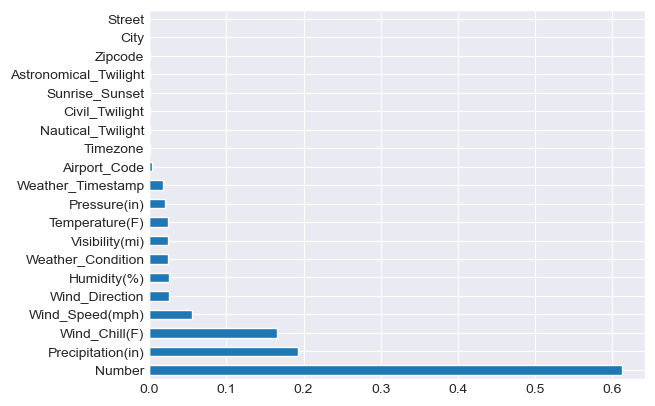

In [9]:
missing_percentage = accidents.isna().sum().sort_values(ascending = False) / len(accidents)
a = missing_percentage[missing_percentage!= 0]
a.plot(kind='barh')

The three fields with the highest % of missing values for the 'accidents' dataset are Numbers, Precipitation(in), and Wind_Chili(F). 
* `Numbers` is a field that shows the street number in address field. 
* `Precipitation(in)` shows precipitation amount in inches, if there is any. 
* `Wind_Chili(F)` shows the wind chill (in Fahrenheit).

### 1.1.3 Weather

In [10]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7479165 entries, 0 to 7479164
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   EventId            object 
 1   Type               object 
 2   Severity           object 
 3   StartTime(UTC)     object 
 4   EndTime(UTC)       object 
 5   Precipitation(in)  float64
 6   TimeZone           object 
 7   AirportCode        object 
 8   LocationLat        float64
 9   LocationLng        float64
 10  City               object 
 11  County             object 
 12  State              object 
 13  ZipCode            float64
dtypes: float64(4), object(10)
memory usage: 798.9+ MB


In [11]:
missing_weather = pd.concat([weather.isnull().sum(), 100 * weather.isnull().mean()], axis=1)
missing_weather.columns=['count','%']
missing_weather.sort_values(by=['%'], ascending=False)

,count,%
ZipCode,59234,0.791987
City,14563,0.194714
EventId,0,0.000000
Type,0,0.000000
Severity,0,0.000000
StartTime(UTC),0,0.000000
EndTime(UTC),0,0.000000
Precipitation(in),0,0.000000
TimeZone,0,0.000000
AirportCode,0,0.000000


<AxesSubplot:>

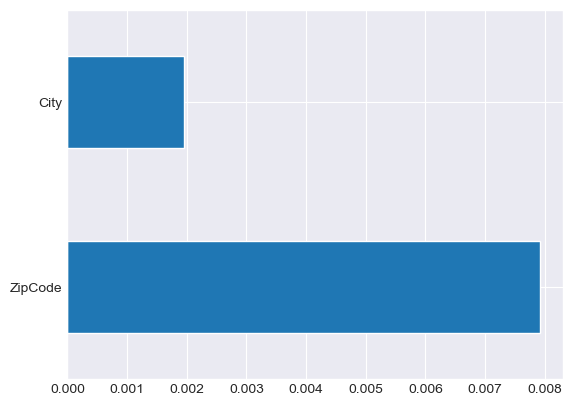

In [12]:
missing_percentage = weather.isna().sum().sort_values(ascending = False) / len(weather)
a = missing_percentage[missing_percentage!= 0]
a.plot(kind='barh')

The two fields with the highest % of missing values for the 'weather' dataset are City, and ZipCode
* `City` refers to the city in address record
* `ZipCode` refers to the zipcode in address record

### 1.1.4 Constructions

In [13]:
constructions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6170627 entries, 0 to 6170626
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [14]:
missing_constructions = pd.concat([constructions.isnull().sum(), 100 * constructions.isnull().mean()], axis=1)
missing_constructions.columns=['count','%']
missing_constructions.sort_values(by=['%'], ascending=False)

,count,%
Number,2674829,43.347767
Precipitation(in),922444,14.948951
Wind_Chill(F),776566,12.584880
End_Lat,634048,10.275261
End_Lng,634048,10.275261
Wind_Speed(mph),340277,5.514464
Wind_Direction,162549,2.634238
Visibility(mi),142246,2.305211
Weather_Condition,138203,2.239691
Humidity(%),122560,1.986184


In [ ]:
missing_percentage = constructions.isna().sum().sort_values(ascending = False) / len(constructions)
a = missing_percentage[missing_percentage!= 0]
a.plot(kind='barh')

Similar to the 'accidents' dataset, the three fields with the highest % of missing values for the 'accidents' dataset are Numbers, Precipitation(in), and Wind_Chili(F).
* `Numbers` is a field that shows the street number in address field. 
* `Precipitation(in)` shows precipitation amount in inches, if there is any. 
* `Wind_Chili(F)` shows the wind chill (in Fahrenheit).

## 1.2 Exploratory Data Analysis

### 1.2.1 Accidents

In [ ]:
accidents.columns

#### State & City

**Q:** Which state has the highest number of accidents? How about per capita?

In [ ]:
accidents.State.value_counts().sort_values(ascending = False).index[0]

California has the highest amount of accidents throughout 2016 to 2021!

**Q:** How many unique cities are there?

In [ ]:
len(accidents.City.unique())

**Q:** Which city has the most accidents?

In [ ]:
(accidents['City'] + ', ' + accidents['County'] + ', ' + accidents['State']).value_counts().head()

In [ ]:
city_accidents = accidents.City.value_counts()
plt.figure(figsize = (5,5))
city_accidents[:20].plot(kind = 'barh')
plt.title("20 cities with the most accidents in the US")
plt.xlabel("Number of Accidents")
plt.ylabel("Cities")
plt.show()

**Q:** Which cities have the most accidents with severity graded 4? \
`Severity` shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

In [ ]:
a = accidents[["City","Severity"]].groupby('City').mean().sort_values('Severity',ascending = False)
a[:20].plot(kind='barh', color=(0.2, 0.4, 0.6, 0.6))
plt.title("Cities with accident severity rate 4")
plt.xlabel("Severity")
plt.show()

In [ ]:
plt.figure(figsize = (9,3))
sns.distplot(city_accidents)
plt.title("Distribution of the accidents")
plt.xlabel("Number of Accidents")
plt.show()

In [ ]:
high_accident_cities = city_accidents[city_accidents >=1000]
low_accident_cities = city_accidents[city_accidents<1000]
plt.figure(figsize = (9,3))
sns.distplot(high_accident_cities)
plt.title("Density of Cities With High Accident Rates")
plt.xlabel("Number of Accidents")
plt.show()

In [ ]:
plt.figure(figsize = (9,3))
sns.distplot(low_accident_cities)
plt.title("Density of Cities With Low Accident Rates")
plt.xlabel("Number of Accidents")
plt.show()

In [ ]:
len(high_accident_cities) / len(accidents.City.unique())

In [ ]:
len(low_accident_cities) / len(accidents.City.unique())

**Q:** How many cities only had one accident from 2016 to 2021?

In [ ]:
city_accidents[city_accidents == 1].sum()

#### Distribution of Accident by Start Time

In [ ]:
accidents.Start_Time = pd.to_datetime(accidents.Start_Time)

**Q:** What is the distribution of start time for all accidents in the US from 2016 to 2021? \
`Start_Time` shows start time of the accident in local time zone.

In [ ]:
sns.distplot(accidents.Start_Time.dt.hour, bins = 24, norm_hist = True )
plt.title("Distribution of Accidents by Hour")
plt.ylabel('Percentage')
plt.show()

It seems that accidents start to intensify between 05:00 am and 07:00 am. In most cities, rush hour typically starts around 7-9 AM in the morning as people commute to work, and then again from 4-6 PM in the afternoon as they return home. During these times, the volume of vehicles on the road increases significantly, leading to more congestion, slower speeds, and longer travel times.

There are several reasons why traffic intensifies during these peak times. Firstly, many people have similar work schedules, so there is a high demand for travel at these times. Additionally, many parents may be dropping off or picking up their children from school, further contributing to traffic volume.

Furthermore, road construction or accidents can also cause delays and exacerbate congestion during peak times. Overall, rush hour traffic tends to be a product of the collective behavior of commuters and the existing transportation infrastructure, and it's not easy to completely avoid it.

In [ ]:
sns.distplot(accidents.Start_Time.dt.dayofweek, bins = 7, kde =False, norm_hist = True )
plt.title("Distribution of Accidents by Day of Week")
plt.ylabel('Percentage')
plt.show()

In [ ]:
weekend = accidents[(accidents.Start_Time.dt.dayofweek == 6) | (accidents.Start_Time.dt.dayofweek == 7)]
sns.distplot(weekend.Start_Time.dt.hour, bins = 24, norm_hist = True )
plt.title("Distribution of Accidents on the Weekend")
plt.ylabel('Percentage')
plt.show()

As expected, the accident rate is much lower in the morning hours compared to the whole week. We can see that accidents has only intensified around 10:00 am on the weekend as more people wake up and attend social activities. It makes sense that accident rates increase in the afternoon because people are out and about doing activities. The reason why the accident rate is still higher at night than on normal days could be because people were driving under the influence.

In [ ]:
sns.distplot(accidents.Start_Time.dt.month, bins = 12, kde = False,  norm_hist = True)
plt.title("Distribution of Accidents by Month")
plt.ylabel('Percentage')
plt.show()

The above figure suggests that more accidents happen toward the end of the year. However, to double check that the result is consistent across every year. Let's check the distribution of accident per year.

In [ ]:
df_2016 = accidents[accidents.Start_Time.dt.year == 2016]
df_2017 = accidents[accidents.Start_Time.dt.year == 2017]
df_2018 = accidents[accidents.Start_Time.dt.year == 2018]
df_2019 = accidents[accidents.Start_Time.dt.year == 2019]
df_2020 = accidents[accidents.Start_Time.dt.year == 2020]
df_2021 = accidents[accidents.Start_Time.dt.year == 2021]

In [ ]:
sns.distplot(df_2016.Start_Time.dt.month, bins = 12, kde = False,  norm_hist = True )
plt.ylabel('Percentage')
plt.show()

In [ ]:
sns.distplot(df_2017.Start_Time.dt.month, bins = 12, kde = False,  norm_hist = True )
plt.ylabel('Percentage')
plt.show()

In [ ]:
sns.distplot(df_2018.Start_Time.dt.month, bins = 12, kde = False,  norm_hist = True )
plt.ylabel('Percentage')
plt.show()

In [ ]:
sns.distplot(df_2019.Start_Time.dt.month, bins = 12, kde = False,  norm_hist = True )
plt.ylabel('Percentage')
plt.show()

In [ ]:
sns.distplot(df_2020.Start_Time.dt.month, bins = 12, kde = False,  norm_hist = True )
plt.ylabel('Percentage')
plt.show()

In [ ]:
sns.distplot(df_2021.Start_Time.dt.month, bins = 12, kde = False,  norm_hist = True )
plt.ylabel('Percentage')
plt.show()

After looking the distrubution of each year we can see that the they do not form a regular distribution. It might be due to a lack of data (2016, 2019 and 2020) or a change in traffic behavior. 

### Start Latitude and Longitude

Latitude and longitude are geographic coordinates that are used to specify a location on the Earth's surface. Latitude is the measurement of a location's distance from the equator, while longitude is the measurement of a location's distance from the Prime Meridian. Together, latitude and longitude provide a precise and universal way of identifying any location on the Earth's surface.

In [ ]:
sns.scatterplot(x = accidents.Start_Lng, y = accidents.Start_Lat)

Since this dataset contains accidents in the United States of America, it makes sense that the locations of these accidents form the shape of the U.S. 

#### Temperature

in general, temperatures above 70°F (21°C) are considered warm and comfortable for most people, while temperatures above 80°F (27°C) can be considered hot. Due to this, let's consider Temparature > 70 F as warm & Temparature < 70 as cold.

*WARM > 70 > COLD*

In [ ]:
accidents[['Temperature(F)', 'City']]

In [ ]:
WARM = len(accidents[accidents['Temperature(F)'] > 70][['Temperature(F)', 'City']])
COLD = len(accidents[accidents['Temperature(F)'] < 70][['Temperature(F)', 'City']])

print('WARM', WARM)
print('COLD', COLD)

In [ ]:
plt.pie([WARM, COLD], autopct="%1.2f%%", labels=['WARM', 'COLD'])